# Write your first ML model

Whether or not this is actually your first model, we are going to take a look at the
famous MNIST data set of handwritten digits. We are going to use a few different ML libs for this.

## Notebook basics
- Use Enter and Escpace to toggle in and out of cells.
- When you are out you can use 'a' and 'b' to insert a new cell above or below.
- Or you can delete a cell with 'dd'.
- You can run the current cell with shift enter (works in both modes).
- You may prefer alt enter which runs cell and creates a new cell after.

## H2O
Let's start our journey by launching a local H2O cluster with one node.

In [ ]:
import h2o
h2o.init()

## Cheats
Run the cell below to enable skeletons, hints and cheats.
To later use these run skeleton('id'), hint('id') or cheat('id') in any cell.

In [ ]:
from cheat import *

### Exercise (t1w)

Take a quick look at the output from h2o.init() above. Anything particularly interesting?

### Exercise (i7b)

It is time to import some data into our H2O cluster. There are two data files in
the notebook workdirectory.
- Find them and import them into H2O.
- View your result X by putting X last in a cell and run the cell.
- Run X.show() and display(X).
- See if you can view X in the Flow UI.

In [3]:
test = h2o.import_file("data/mnist/mnist.test.csv.gz")
train = h2o.import_file("data/mnist/mnist.train.csv.gz")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


### Exercise (2if)
Find the target column of the two imported frames and convert its datatype to enum.
The conversion is done by the 'asfactor' method. To select a column from a dataframe use square brackets df\[...\]. What goes between brackets can be a column name, number, or a list, however not all combinations will work when assigning columns.

In [4]:
train[-1] = train[-1].asfactor()
test[-1] = test[-1].asfactor()

### Exercise (ot5)

Often one will split off a part of training data into a validation set.
The validation set serves as a proxy for testing models 'in the wild'.
Scores measured on the training set are not reliable as many algorithms produce
perfect or near perfect training scores.
Split the training frame into two parts: train (80% of rows) and valid (remaining 20%).

In [5]:
# Your code here #
train, valid = train.split_frame([0.8])
display(valid.head(3))
display(train.head(3))

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,133,151,254,254,220,93,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,83,254,253,253,253,253,253,253,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,253,254,253,253,253,253,253,253,170,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,253,254,253,206,84,170,242,253,253,24,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,211,254,254,254,254,255,223,141,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,253,253,253,253,253,253,253,64,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,13,185,197,253,253,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,252,252,253,252,252,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,239,252,252,253,231,141,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,214,252,252,206,222,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,105,105,105,123,253,253,253,253,255,253,156,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,252,252,252,252,252,252,252,252,253,252,252,231,164,18,0,0,0,0,0,0,0,0,0,0,0,0,0,208,252,252,252,252,252,252,252,252,253,252,252,252,252,74,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,210,253,205,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,252,252,252,229,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213,252,252,252,253,212,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,91,202,254,254,254,107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,60,225,253,253,253,253,253,241,96,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,135,253,253,253,253,253,253,253,253,253,253,32,0,0,0,0,0,0,0,0,0,0,0


## Ploting images

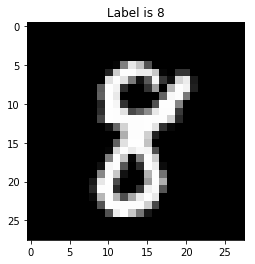

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# converts to pandas dataframe (if pandas is installed)
test_pd = test.as_data_frame()
pixels = test_pd.iloc[:,list(range(0,28*28))]
labels = test_pd.iloc[:,28*28]

def draw_pixels(pixels, labels, num):
    data = np.array(pixels.iloc[num], dtype='uint8')
    data = data.reshape((28, 28))
    plt.title('Label is {label}'.format(label=labels.iloc[num]))
    plt.imshow(data, cmap='gray')
    plt.show()
    
draw_pixels(pixels, labels, 0)

## Finally Machine Learning

We begin with they laziest way, throwing the data into a off the shelf algorithm. Nevertheless, the next exercise is a bigger one.

### Exercise (j9s)
Create a random forest model using H2O with default settings. The algorithm needs a dataframe with training data, which we constructed before, and it also needs to know names or numbers of training columns and name or number of target column. Also provide the validation dataframe so that you can compare metrics on these two sets during and after training.

In python objects are created by a method call to the class type. The parameters can be ordered or named, like so:

obj = NameOfClass(param1 , param2, ... , named_param1=value1, named_param2=value2, ...)

Named parameters are optional and have default values.

While your model trains, go into FLOW and click Model -> List all models -> Click your model. Finally you can click refresh to see stats update continuously.
Get acquainted with logloss, variable importance, hitratio (see below), and more.
How do these differ between training set and validation set?

### Hitratio
Hitratio is a bit hard to find info about;
1-hitratio: for each image we let the model output 1 prediction it is the most confident about, if the prediction matches the true target, that image counts as a hit. 1-hitratio is then \[ #images hit \]/\[#total images\].

If we would compute 2-hitratio, then we let the model take two guesses at each image, and if it got either of the guesses correct, then that image counts as a hit, and so on.

## Test performance

### Exercise (sj8)
Using estimator.model_performance(df) lets you measure various performance metrics on a data frame df without going into the FLOW ui. Check the random forest's performance on train, validation and test sets.

## Deep Learning
I mean why not...

### Exercise (7fe)
Repeat the procedure above but change H2ODeepLearningEstimator to H2ODeepLearningEstimator.

- Which is better out of the box for this data set?
- Which took longer to train?
- How was the gap between validation and test errors?

## Downloading POJO/MOJO
H2O models can be downloaded in two Java compatible forms. 

## Goodbye H2O

In [ ]:
h2o.cluster().shutdown()

### Keras on Tensorflow
So far we have not exploited at all the position of pixels in the plane. It is widely known that convolutional networks (CNNs) are a great way share weights among translated descriptors. This is a fancy way of saying that we can keep the number of variables (weights) much smaller by encoding assumptions about images in the structure of the model. For example, if we have a 5x5 filter that can detect horizontal edges in one part of the image, we have reason to believe it has the same ability applied in a different part of the image.

TensorFlow is a Google library for graph computations (and neural networks as a special but important case). TensorFlow is popular also because it provides a general backend so that any or most neural networks can be implemented on top of it and it is possible to export models and run them in a JVM.

Keras is a high level library that can use TensorFlow as a backend, but makes life much easier for the programmer.

Hence we will use Keras-TF to train a CNN.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


### Loading data as pandas Dataframe
Pandas dataframes are similar to H2O's, but run in a single python instance*. Compared to H2O's dataframes,
pandas offers far more operations and seems to be more mature as of today. By default pandas will try
to guess the schema of csv files by parsing the first row. As our data does not have a header, we have to specify that.

*The DASK project provides dataframes distributed on a cluster which are backed by pandas dataframes.

In [24]:
train = pd.read_csv('data/mnist/mnist.train.csv.gz', header=None)
test = pd.read_csv('data/mnist/mnist.test.csv.gz', header=None)

### Exercise (2kj)
- Create dataframes X_train and X_test which consist of all columns except the target column. Run help(pd.DataFrame.drop) and find out what arguments you need to provide.
- Create Series Y_train and Y_test which consist of the target column only. Run help(pd.DataFrame.loc) and read the first example and the one on 'Set value for an entire column'. However you may need to use iloc instead of loc if you want to reference a column by an integer. (There is also help on iloc if you are curious.)
- Delete train and test to save memory.

In [25]:
Y_train = train.iloc[:,28*28]
X_train = train.drop(28*28, axis = 1)
Y_test = test.iloc[:,28*28]
X_test = test.drop(28*28, axis = 1)
del train, test

In [53]:
import inspect

def cheat(code):
    cheat_dict = {
      't1w': "Paste the url into your browser, localhost:54321 or 127.0.0.1:54321",
      'i7b': '''test = h2o.import_file("data/mnist/mnist.test.csv.gz")
                train = h2o.import_file("data/mnist/mnist.train.csv.gz")''',
      '2if': '''train[-1] = train[-1].asfactor()
                test[-1] = test[-1].asfactor()''',
      'ot5': "train, valid = train.split_frame([0.8])",
      'j9s': '''from h2o.estimators import H2ORandomForestEstimator
                x = list(range(28*28))
                y = 28*28
                rf = H2ORandomForestEstimator()
                rf.train(x,y,training_frame=train, validation_frame=valid)''',
      'sj8': '''rf.model_performance(train)
                rf.model_performance(valid)
                rf.model_performance(test)''',
      '2kj': '''Y_train = train.iloc[:,28*28]
                X_train = train.drop(28*28, axis = 1)
                Y_test = test.iloc[:,28*28]
                X_test = test.drop(28*28, axis = 1)
                del train, test
             ''',
      'kalle': '''print(X_test[0].shape)
                  print(X_test[0][:,:,0].shape)''',
      'bella': '''model = Sequential()
                  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', input_shape = (28,28,1)))''',
      'giorgio': "model.add(MaxPool2D(pool_size=(2,2)))",
      'charles': '''# you may leave out 'rate=' from the next line
                    model.add(Dropout(rate=0.25))'''
    }
    if code in cheat_dict:
        print(inspect.cleandoc(cheat_dict[code]))
    else:
        print('Invalid exercise id, Naughty cheater!')

def hint(code):
    hint_dict = {
      't1w': "Urls can be interesting :)",
      'i7b': "Use h2o.import_file",
      '2if': "In Python [-1] can be used to access the last column",
      'ot5': "Use df.split_frame(list_of_fractions)",
      'j9s': '''https://h2o-release.s3.amazonaws.com/h2o/rel-wolpert/11/docs-website/h2o-py/docs/modeling.html#h2o.estimators.estimator_base.H2OEstimator
                On the page search for 'Train the H2O model'.
                Then click on H2ORandomForestEstimator on the left pane.
                The full name of the model class you want is h2o.estimators.H2ORandomForestEstimator.''',
      'sj8': "model_performance works just as a java method (it is a method on the model/estimator), and it has one argument which is the dataframe to measure performance on.",
      '2kj': "Hint 1: to select all rows, use colon. Hint 2: axis has to do with dropping rows vs columns.",
      'kalle': '''First part: X_test[0] extracts the first slice along the first dimension. This represents the first image. What is its shape?
                  Second part: Select a slice of X_test[0], where the first two dimensions take any value, and the last takes only value 0.''',
      'bella': "There are two hints! Run either of hint('bella_adding_layer'), hint('bella_create_layer') or hint('bella_kernel_size').",
      'bella_adding_layer': "use model.add(your_layer_here)",
      'bella_create_layer': "NameOfLayer(param1 , param2, ... , named_param1=value1, named_param2=value2, ...)",
      'bella_kernel_size': "kernel_size=(5,5), this is a python tuple",
      'giorgio': "follow the solution of previous exercise, but use pool_size as the only parameter",
      'charles': "follow the solution of previous exercise, but use rate as the only parameter"
    }
    if code in hint_dict:
        print(inspect.cleandoc(hint_dict[code]))
    else:
        print('Invalid exercise id. Did you type the id correctly?')

def skeleton(code):
    skel = {
        't1w': "Sorry no skeleton here",
        'i7b': '''test = h2o.{fill_in}("fill_in")
                  train = h2o.{fill_in}("fill_in")''',
        'j9s': '''from h2o.estimators import H2ORandomForestEstimator
                  x = fill_in 
                  y = fill_in
                  rf = H2ORandomForestEstimator()
                  rf.train(fill_in_here)''',
        'ot5': "train, valid = train.fill_in",
        '2if': '''train[fill_in] = train[fill_in].asfactor()
                  test[fill_in] = test[fill_in].asfactor()''',
        'sj8': "Sorry no skeleton here",
        '2kj': '''Y_train = train.iloc[fill_in_to_select_all_rows,fill_in_to_select_target_column]
                  X_train = train.drop(fill_in)
                  Y_test = test.iloc[fill_in,fill_in]
                  X_test = test.drop(fill_in)
                  del train, test
               ''',
        'kalle': "No skeleton, but checkout the hint if needed.",
        'bella': '''model = Sequential()
                    model.add(__fill_in__(filters = __fill_in__, kernel_size = __fill_in__ ,padding = 'Same', 
                    activation =__fill_in__, input_shape = __fill_in__))''',
        'giorgio': "model.add(MaxPool2D(__fill_in__))",
        'charles': "model.add(Dropout(__fill_in__))",

    }
    if code in skel:
        print(inspect.cleandoc(skel[code]))
    else:
        print('No skeletons in this wardrobe. Did you type the id correctly?')
        
        


### Rescaling
Rescaling the input to be between 0 and 1 help the CNN to converge faster and better.
Without this, learning size of weights and thereby gradients will be unbalanced across layers and we would need smaller learning rates, increasing the risk for numerical errors.

In [26]:
X_train = X_train/255
X_test = X_test/255

### Reshaping
Some frameworks for training NNs, including Keras assume that input is a tensor of higher dimension than 2 (which would be matrix). The input tensor here should be num_examples x height x width x channels. Number of channels is 1 since we have gray-scale pictures, and the -1 means that numpy should figure out how many rows.
Reshaping thus reshapes our n x 28^2 tensor to a n x 28 x 28 x 1 tensor.
Finally we are using the 2D geometri of the data.

In [27]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

### Exercise (kalle)
Since X_train and X_test are now numpy arrays, lets take a look at them. We can use indexing and slicing on numpy objects in a similar way we have done on pandas dataframes, however this is easier and does not require loc and iloc.
- Use the .shape attribute of numpy arrays to find out the shape of part of the tensor which hold the first image.
- Remove the last dimension from this part of the tensor and confirm that the result has shape (28,28).

### Label encoding
The targets (or labels as they can be called), have numerical values which seems to indicate that guessing a nearby number is better than guessing a far number. However we only care about guessing right or wrong so that is not the loss function we want. We will therefore apply one-hot encoding to the labels, representing for example the number 3 as \[0,0,3,0,0,0,0,0,0,0\]. This is the expected format of the loss function categorical crossentropy that we will use.

In [36]:
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

### Neural network architecture

An important part of training a neural network is to design an architecture. We will use a feed-forward
architecture https://en.wikipedia.org/wiki/Feedforward_neural_network with convolutional layers as the main components. A classical approach is to intertwine convolutional layers https://en.wikipedia.org/wiki/Convolutional_neural_network with maxpooling layers and finish off with fully connected layers. Moreover, to prevent overfitting (which could happen very easily with the huge number of variables), dropout layers help a great deal.

A part of the network architecture are so called activation functions which are typically stuck between two layers. Activation functions are simply applied on each value (neuron) before being fed into the next layer.

A popular and powerful activation function is the rectified linear unit, or ReLU. https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

### Convolutional layer

A convolutional layer has several filters which can be seen as small matrixes which determine how to average m-by-m pixels of the image into a single value. In Keras this m is called kernel_size and the number of filters is simply 'filters'. Each filter could learn different things, which is why we need more than 1 filter. For example a filter could detect 45 degree lines , or it could detect upper-right-corners.

What is nice about this is that we don't need to tell the algorithm what filters (or features) are important.

When several convolutional (or other layers) are stacked on top of eachother, higher level features can be learned such as arcs of different curvature, or even body parts or cats or dogs.

### Exercise (bella)
Add a first convolutional layer with 32 filters, averaging over 5-by-5 pixels, relu activation, correct input_shape and padding ='Same'. Run help(Conv2D) and the cell above to get some info.

In [42]:
# Feed-forward network
model = Sequential()

# __fill_in__ #

### Rinse and repeat
Add another identical layer, but do not include input_shape since this is not the first layer.

In [42]:
## repeat

### Maxpooling
A maxpooling layer divides up the image into k-by-k boxes side by side. Each box gives one node in the layer and the value of that node is simply the maximum of the values in the k-by-k box.

### Exercise (giorgio)
Add a maxpooling layer with 2-by-2 size.

### Dropout
A Dropout layer randomly sets a fraction `rate` of input units to 0 at each update during training time. The random choice is made independently of both neuron and training example.

### Exercise (charles)
Add a dropout layer with 25% rate.

In [ ]:




model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [22]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86
# Without data augmentation i obtained an accuracy of 0.98114
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_test, Y_test), verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
 - 170s - loss: 8.3408 - acc: 0.1723 - val_loss: 1.1703 - val_acc: 0.6518


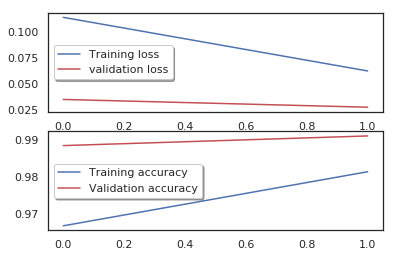

In [78]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)